<h2><u>Machine Learning And NLP</u></h2>

# Module 2 - Supervised Learning : Regresssion

## Demo 2 : Multiple Linear-Regression and Regularization  

In this demo, you will be building a Multiple Linear Regression Model and Regularize it 

---

## Problem statement:

Given the dataset of student scores,predict Physics Score based on Math and Statistics Scores

##### Solution:

<div style="background-color:##EDF9FF">
 <ul><li><h3>Import required libraries</h3></li></ul>
</div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 8.0)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm

## Dataset

The dataset contains scores of various students 

- <b>math:</b> student score in Maths
- <b>statistics:</b> student score in Statistics
- <b>physics:</b> student score in Physics

<div style="background-color:##EDF9FF">
 <ul><li><h3>Read dataset from csv file</h3></li></ul>
</div>

In [2]:
data = pd.read_csv('student.csv') #reading data
data.head()

,Math,Statistics,Physics
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [3]:
math = data['Math'].values #storing dataframe values as variables
stats = data['Statistics'].values
physics = data['Physics'].values

<div style="background-color:##EDF9FF">
 <ul><li><h3>Plotting the Actual values in 3-D scatter plot</h3></li></ul>
</div>

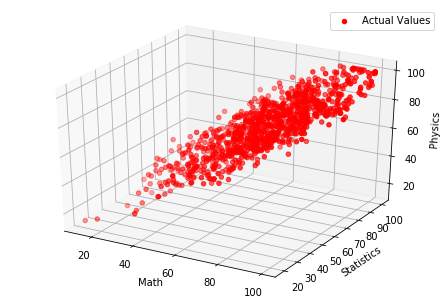

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, stats, physics, color='r',label='Actual Values')
ax.set_xlabel('Math')
ax.set_ylabel('Statistics')
ax.set_zlabel('Physics')
ax.legend()
plt.show()

In [6]:
x=data[['Math','Statistics']].values #Restructuring the Dataframe 
y=data['Physics'].values

<div style="background-color:##EDF9FF">
 <ul><li><h3>Splitting and Training the model</h3></li></ul>
</div>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<div style="background-color:##EDF9FF">
 <ul><li><h3>Fitting the model</h3></li></ul>
</div>

In [8]:
regressor=LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div style="background-color:##EDF9FF">
 <ul><li><h3>Print R-squared value</h3></li></ul>
</div>

In [9]:
regressor.score(X_test,y_test)

0.9052409628220129

<div style="background-color:##EDF9FF">
 <ul><li><h3>Print co-efficient and Intercept</h3></li></ul>
</div>

In [10]:
print(regressor.coef_)
print(regressor.intercept_)

[0.09356445 0.91854045]
-1.9502732952918507


<div style="background-color:##EDF9FF">
 <ul><li><h3>Finding Actual vs Predicted values</h3></li></ul>
</div>

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head()
df1

,Actual,Predicted
0,67,62.824441
1,58,59.524537
2,77,76.993909
3,66,66.668627
4,38,37.521818


<div style="background-color:##EDF9FF">
 <ul><li><h3>Plotting Actual vs Predicted values</h3></li></ul>
</div>

AttributeError: 'numpy.ndarray' object has no attribute 'type'

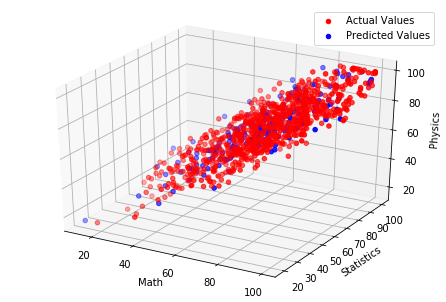

In [13]:
fig = plt.figure(2)
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='r',label='Actual Values')
ax.scatter(X_test[:,0],X_test[:,1], y_pred, color='b',label='Predicted Values')
ax.set_xlabel('Math')
ax.set_ylabel('Statistics')
ax.set_zlabel('Physics')
ax.legend()
plt.show()

<div style="background-color:##EDF9FF">
 <ul><li><h3>Building model using Statsmodel</h3></li></ul>
</div>

In [13]:
import statsmodels.api as sm
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     5034.
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        21:25:50   Log-Likelihood:                -2939.1
No. Observations:                1000   AIC:                             5884.
Df Residuals:                     997   BIC:                             5899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4624      0.722     -2.026      0.0

<div style="background-color:##EDF9FF">
 <ul><li><h3>Regularizing the model using Ridge Regression</h3></li></ul>
</div>

In [14]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

4.6138079654308015
0.91080604638622
4.4146747628541485
0.9052409670566202


<div style="background-color:##EDF9FF">
 <ul><li><h3>Regularizing the model using Lasso Regression</h3></li></ul>
</div>

In [15]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

4.613808167984843
0.9108060385546863
4.41458086310399
0.9052449980466108


<div style="background-color:##EDF9FF">
 <ul><li><h3>Regularizing the model using Elastic net</h3></li></ul>
</div>

In [16]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

4.613808162550541
0.9108060387647978
4.414583736900638
0.9052448746796575


<b> conclusion </b> : We have built a multiple linear regression model and regularized it using different regularization techniques